## Normalization 
### types of normalization 
#### MinMaxScaling,
#### Mean normalization,
#### Max absolute,
#### Robust Scaling

In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class label","Alcohol","Malic Acid"]

In [6]:
df.sample(10)

,Class label,Alcohol,Malic Acid
150,3,13.50,3.12
51,1,13.83,1.65
164,3,13.78,2.76
111,2,12.52,2.43
22,1,13.71,1.86
39,1,14.22,3.99
167,3,12.82,3.37
124,2,11.87,4.31
132,3,12.81,2.31
105,2,12.42,2.55


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

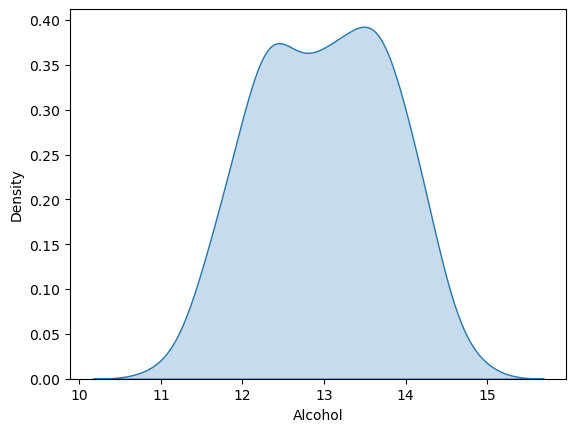

In [55]:
sns.kdeplot(df["Alcohol"],shade=True)

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

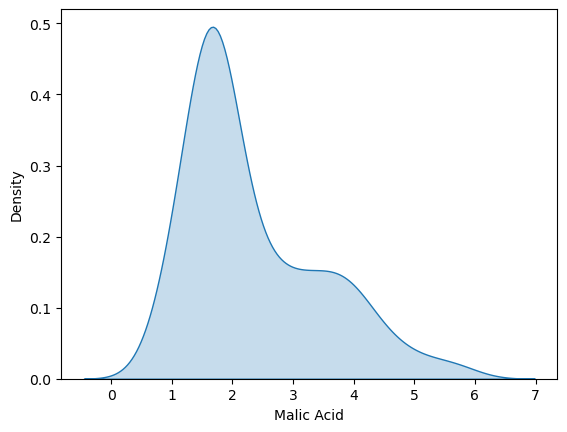

In [48]:
sns.kdeplot(df["Malic Acid"],fill=True)

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

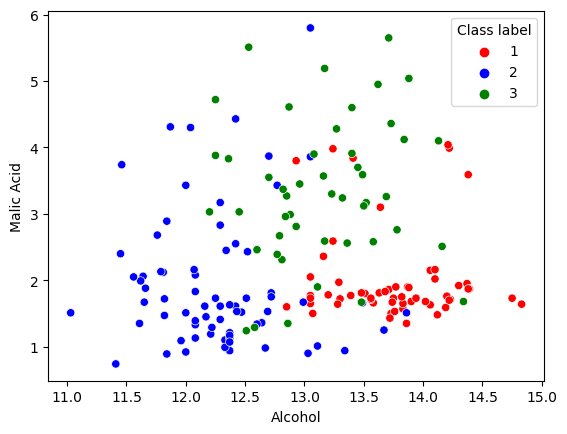

In [46]:
sns.scatterplot(x=df["Alcohol"],y=df["Malic Acid"],hue=df["Class label"],palette={1:"red",2:"blue",3:"green"})

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Class label",axis=1),df["Class label"],test_size=0.3,random_state=0)

In [18]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale=MinMaxScaler()

In [21]:
scale.fit(x_train)
x_train_scale=scale.transform(x_train)
x_test_scale=scale.transform(x_test)


In [25]:
x_train_scale=pd.DataFrame(x_train_scale,columns=x_train.columns)
x_test_scale=pd.DataFrame(x_test_scale,columns=x_test.columns)

Text(0.5, 1.0, 'After Min Max Scaling')

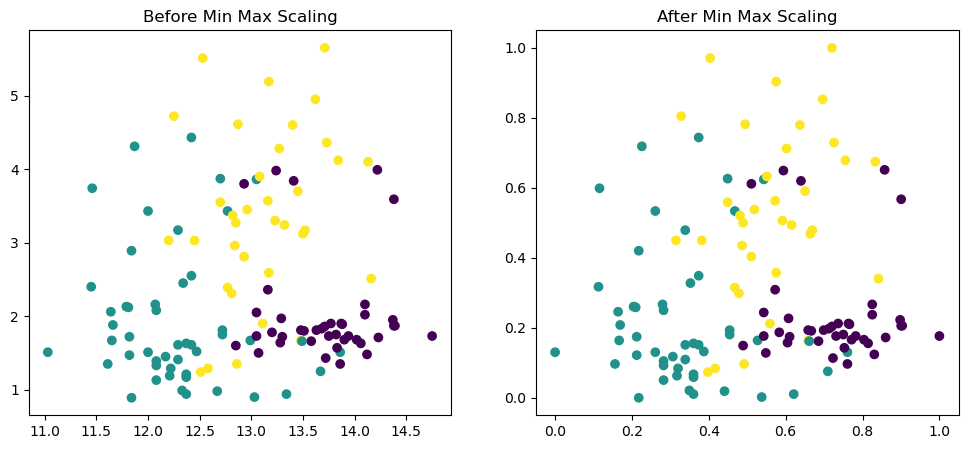

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
## before minmaxScaling
ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"],c=y_train)
ax1.set_title("Before Min Max Scaling")

## After minmaxScaling 
ax2.scatter(x_train_scale["Alcohol"],x_train_scale["Malic Acid"],c=y_train)
ax2.set_title("After Min Max Scaling")

<AxesSubplot:title={'center':'After Min max Scaling'}, xlabel='Alcohol', ylabel='Density'>

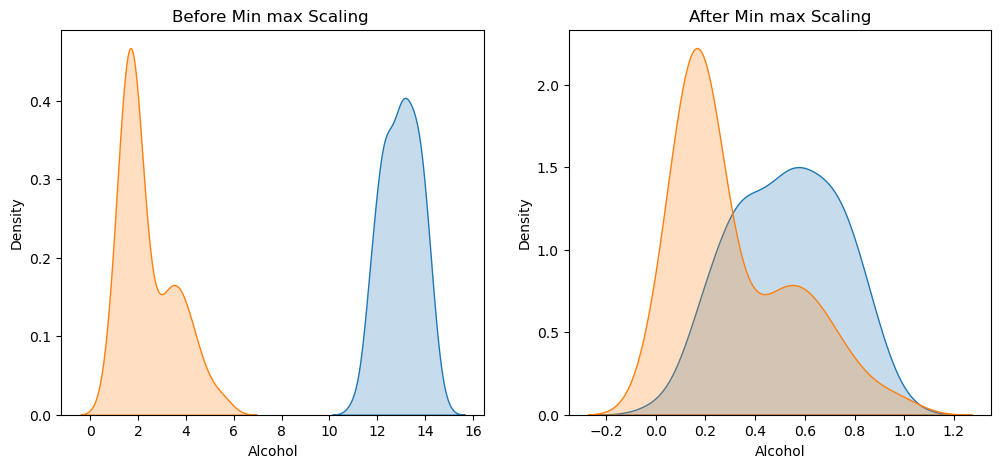

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train["Alcohol"],ax=ax1,shade=True)
sns.kdeplot(x_train["Malic Acid"],ax=ax1,shade=True)
ax1.set_title("Before Min max Scaling ")

ax2.set_title("After Min max Scaling")
sns.kdeplot(x_train_scale["Alcohol"],ax=ax2,shade=True)
sns.kdeplot(x_train_scale["Malic Acid"],ax=ax2,shade=True)

## alcohol Distribution before and After
    

<AxesSubplot:title={'center':'After Min max Scaling'}, xlabel='Alcohol', ylabel='Density'>

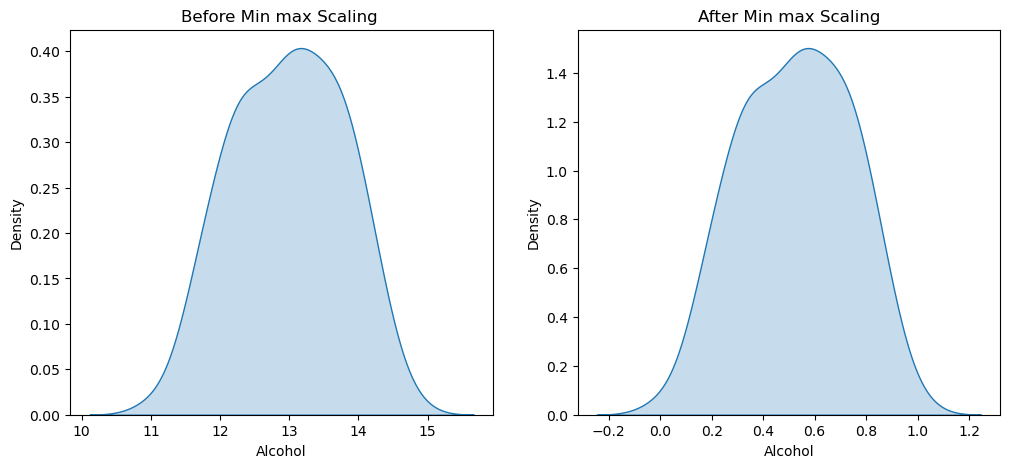

In [52]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train["Alcohol"],ax=ax1,shade=True)
# sns.kdeplot(x_train["Malic Acid"],ax=ax1)
ax1.set_title("Before Min max Scaling ")

ax2.set_title("After Min max Scaling")
sns.kdeplot(x_train_scale["Alcohol"],ax=ax2,shade=True)
# sns.kdeplot(x_train_scale["Malic Acid"],ax=ax2)

## Malic Acid Distribution 

<AxesSubplot:title={'center':'After Min max Scaling'}, xlabel='Malic Acid', ylabel='Density'>

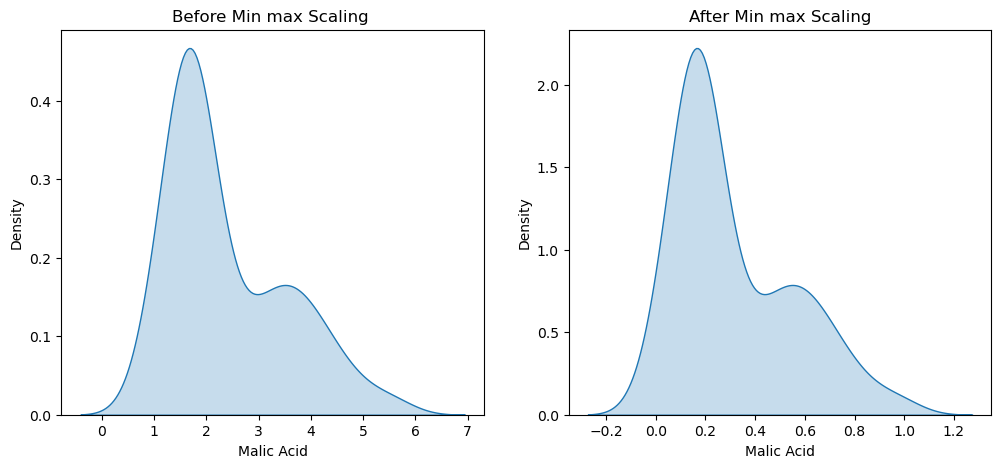

In [56]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# sns.kdeplot(x_train["Alcohol"],ax=ax1)
sns.kdeplot(x_train["Malic Acid"],ax=ax1,shade=True)
ax1.set_title("Before Min max Scaling ")

ax2.set_title("After Min max Scaling")
# sns.kdeplot(x_train_scale["Alcohol"],ax=ax2)
sns.kdeplot(x_train_scale["Malic Acid"],ax=ax2,shade=True)

In [ ]:
## rarely standard Scaler are used 
## robust normalization is used when there is more outlier in data 
### min max scaling is used if